In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
#Dataset of baseball league data from 1962 -2002
baseball_file = "/Users/bluefish/Documents/Projects/R/baseball.csv"


In [3]:
baseball = pd.read_csv(baseball_file)

In [13]:
baseball.shape

(1232, 15)

In [6]:
baseball.columns
#Column Descriptions : RS - Run Scored, RA - Runs Allowed, W - No. of Wins
baseball.dtypes

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')
Team             object
League           object
Year              int64
RS                int64
RA                int64
W                 int64
OBP             float64
SLG             float64
BA              float64
Playoffs          int64
RankSeason      float64
RankPlayoffs    float64
G                 int64
OOBP            float64
OSLG            float64
dtype: object


In [7]:
baseball.head()

  Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs  RankSeason  \
0  ARI     NL  2012  734  688  81  0.328  0.418  0.259         0         NaN   
1  ATL     NL  2012  700  600  94  0.320  0.389  0.247         1         4.0   
2  BAL     AL  2012  712  705  93  0.311  0.417  0.247         1         5.0   
3  BOS     AL  2012  734  806  69  0.315  0.415  0.260         0         NaN   
4  CHC     NL  2012  613  759  61  0.302  0.378  0.240         0         NaN   

   RankPlayoffs    G   OOBP   OSLG  
0           NaN  162  0.317  0.415  
1           5.0  162  0.306  0.378  
2           4.0  162  0.315  0.403  
3           NaN  162  0.331  0.428  
4           NaN  162  0.335  0.424  


In [8]:
baseball.describe()

              Year           RS           RA            W          OBP  \
count  1232.000000  1232.000000  1232.000000  1232.000000  1232.000000   
mean   1988.957792   715.081981   715.081981    80.904221     0.326331   
std      14.819625    91.534294    93.079933    11.458139     0.015013   
min    1962.000000   463.000000   472.000000    40.000000     0.277000   
25%    1976.750000   652.000000   649.750000    73.000000     0.317000   
50%    1989.000000   711.000000   709.000000    81.000000     0.326000   
75%    2002.000000   775.000000   774.250000    89.000000     0.337000   
max    2012.000000  1009.000000  1103.000000   116.000000     0.373000   

               SLG           BA     Playoffs  RankSeason  RankPlayoffs  \
count  1232.000000  1232.000000  1232.000000  244.000000    244.000000   
mean      0.397342     0.259273     0.198052    3.122951      2.717213   
std       0.033267     0.012907     0.398693    1.738349      1.095234   
min       0.301000     0.214000     0

In [20]:
baseball['Year'].value_counts().sort_index(ascending=False)

2012    30
2011    30
2010    30
2009    30
2008    30
2007    30
2006    30
2005    30
2004    30
2003    30
2002    30
2001    30
2000    30
1999    30
1998    30
1997    28
1996    28
1993    28
1992    26
1991    26
1990    26
1989    26
1988    26
1987    26
1986    26
1985    26
1984    26
1983    26
1982    26
1980    26
1979    26
1978    26
1977    26
1976    24
1975    24
1974    24
1973    24
1971    24
1970    24
1969    24
1968    20
1967    20
1966    20
1965    20
1964    20
1963    20
1962    20
Name: Year, dtype: int64

<AxesSubplot:xlabel='W', ylabel='Playoffs'>

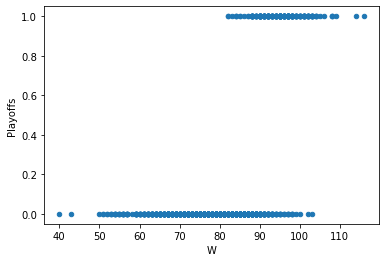

In [55]:
baseball.plot.scatter('W', 'Playoffs')

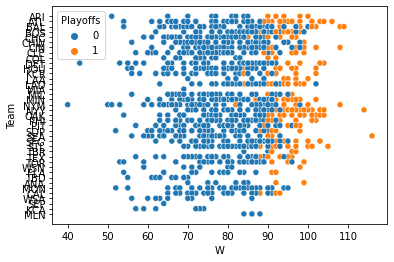

In [58]:
sns.scatterplot(x="W", y="Team",
              hue="Playoffs",
              data=baseball);

In [ ]:
#From the above graph it can be inferred that Teams with more than 90 wins have a strong chance to make play offs
#The goal is to estimate how many runs scored and runs allowed leads to 90+ wins

In [27]:
#To predict wins from Run Difference 'RD'
#Select training subset, in this case before Year 2002
bb_train = baseball.loc[baseball['Year']<2002,["Year","Team","League", "RS", "RA", "W"]]
bb_train.shape


(902, 6)

In [16]:
bb_train['Year'].max()

2001

In [31]:
#Adding new column Run Difference (RD) to be used as independent variable
bb_train['RD'] = bb_train['RS'] - bb_train['RA']
bb_train.columns

Index(['Year', 'Team', 'League', 'RS', 'RA', 'W', 'RD'], dtype='object')

In [32]:
bb_train['RD'].describe()

count    902.000000
mean       0.000000
std      101.188684
min     -331.000000
25%      -70.750000
50%        3.000000
75%       69.750000
max      309.000000
Name: RD, dtype: float64

<AxesSubplot:xlabel='RD', ylabel='W'>

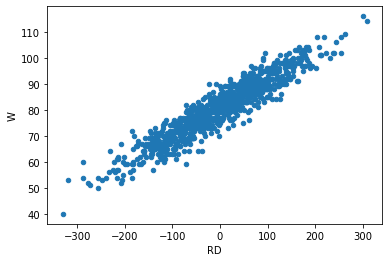

In [33]:
bb_train.plot.scatter('RD', 'W')

In [34]:
bb_train['W'].corr(bb_train['RD'])

0.9385149822977122

<AxesSubplot:>

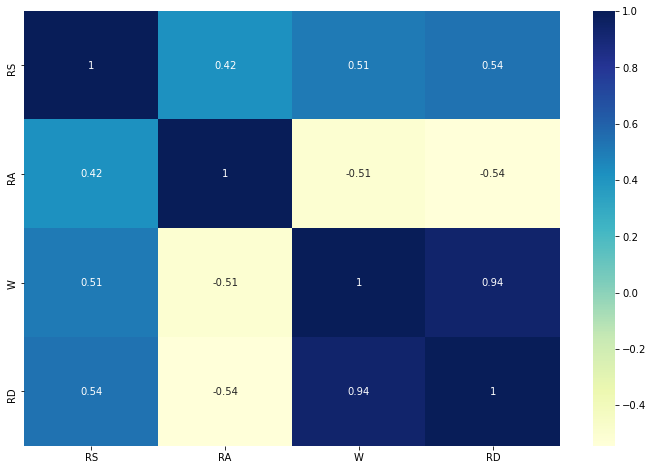

In [39]:
corrMat = bb_train[['RS', 'RA', 'W', 'RD']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrMat, annot=True, cmap = 'YlGnBu')

In [40]:
X = bb_train['RD']
Y = bb_train['W']


w_model = sm.OLS(Y, X).fit()
w_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      W   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):              0.016
Method:                 Least Squares   F-statistic:                              15.72
Date:                Tue, 01 Dec 2020   Prob (F-statistic):                    7.92e-05
Time:                        17:05:15   Log-Likelihood:                         -5243.4
No. Observations:                 902   AIC:                                  1.049e+04
Df Residuals:                     901   BIC:                                  1.049e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD             0.1058      0.027      3.965      0.000       0.053       0.158
==============================================================================
Omnibus:                        5.788   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.736
Skew:                          -0.195   Prob(JB):                       0.0568
Kurtosis:                       3.033   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
predictions = w_model.predict(X) # make predictions using the model

In [45]:
X = bb_train['RD'].values.reshape(-1, 1)
Y = bb_train['W'].values.reshape(-1, 1)

w_model_sk = LinearRegression()  
w_model_sk.fit(X, Y)  # perform linear regression

In [60]:
print(w_model_sk.intercept_ )
print(w_model_sk.coef_)

[80.88137472]
[[0.10576562]]


In [ ]:
#W = 80.88 + (.1058 * RD)
#To get to 90 wins
#90 = 80.88 + (.1058 * RD) 
# A run difference of 87 i.e. teams which score 87 more runs than they allow are likely to win 90+ games and make playoffs

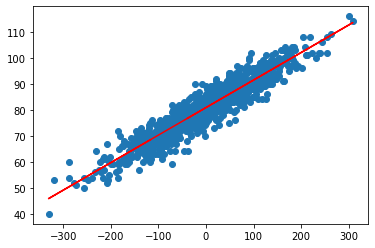

In [46]:
Y_pr = w_model_sk.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pr, color='red')
